In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from skeletonpose import PoseEstimator, BackgroundMethod
from skeletonpose import plot_keypoints, img_show

In [3]:
import torch
import cv2
from mmdet.apis import init_detector
from mmpose.apis import init_model
from segment_anything import sam_model_registry

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device:", device)

img_path = "../examples/img4.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

device: cuda:0


In [4]:
POSE_CONFIG = "/home/ohwada/HPE/checkpoints/rtmpose-l_8xb256-420e_coco-256x192.py"
POSE_CHECKPOINT = "/home/ohwada/HPE/checkpoints/rtmpose-l_simcc-coco_pt-aic-coco_420e-256x192-1352a4d2_20230127.pth"
DET_CONFIG = "/home/ohwada/HPE/checkpoints/rtmdet_l_8xb32-300e_coco.py"
DET_CHECKPOINT = "/home/ohwada/HPE/checkpoints/rtmdet_l_8xb32-300e_coco_20220719_112030-5a0be7c4.pth"
CHECK_POINT_L = "/home/ohwada/HPE/checkpoints/sam_vit_l_0b3195.pth"
SAM_MODEL_L = "vit_l"

In [5]:
pose_model = init_model(POSE_CONFIG, POSE_CHECKPOINT, device=device)
det_model = init_detector(DET_CONFIG, DET_CHECKPOINT, device=device)

sam = sam_model_registry[SAM_MODEL_L](checkpoint=CHECK_POINT_L).to(device=device)

Loads checkpoint by local backend from path: /home/ohwada/HPE/checkpoints/rtmpose-l_simcc-coco_pt-aic-coco_420e-256x192-1352a4d2_20230127.pth
Loads checkpoint by local backend from path: /home/ohwada/HPE/checkpoints/rtmdet_l_8xb32-300e_coco_20220719_112030-5a0be7c4.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std



In [6]:
pose_estimator = PoseEstimator(pose_model, det_model, sam)

In [7]:
results = pose_estimator.predict(img_path, BackgroundMethod.MEAN_COLOR_BACKGROUND)

10/20 23:18:16 - mmengine - WARNING - The current default scope "mmdet" is not "mmpose", `init_default_scope` will force set the currentdefault scope to "mmpose".


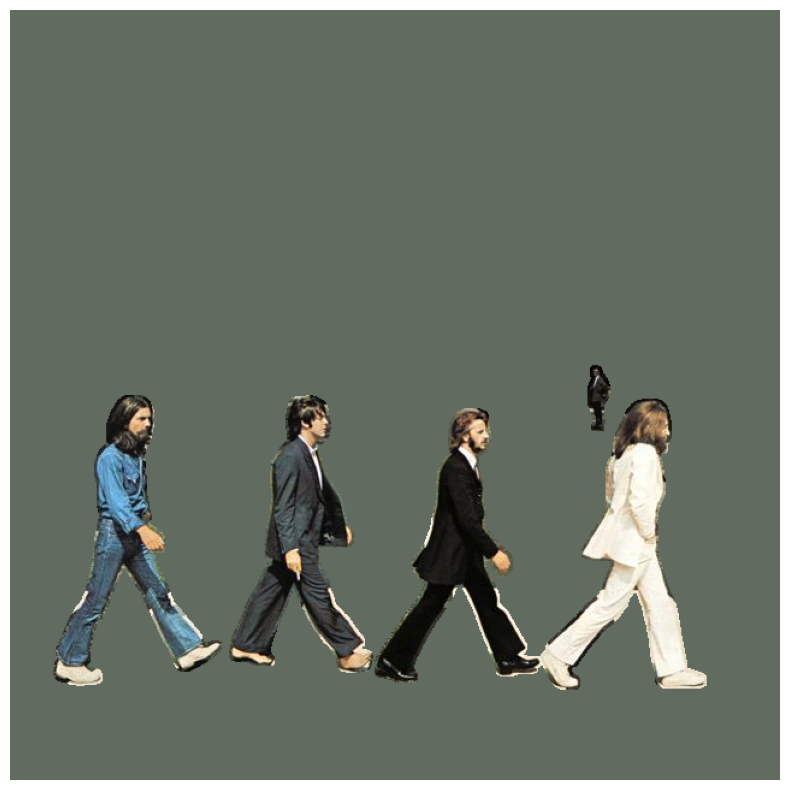

In [8]:
processed_img = pose_estimator.get_processed_img()
img_show(processed_img, figure_size=(10, 10))

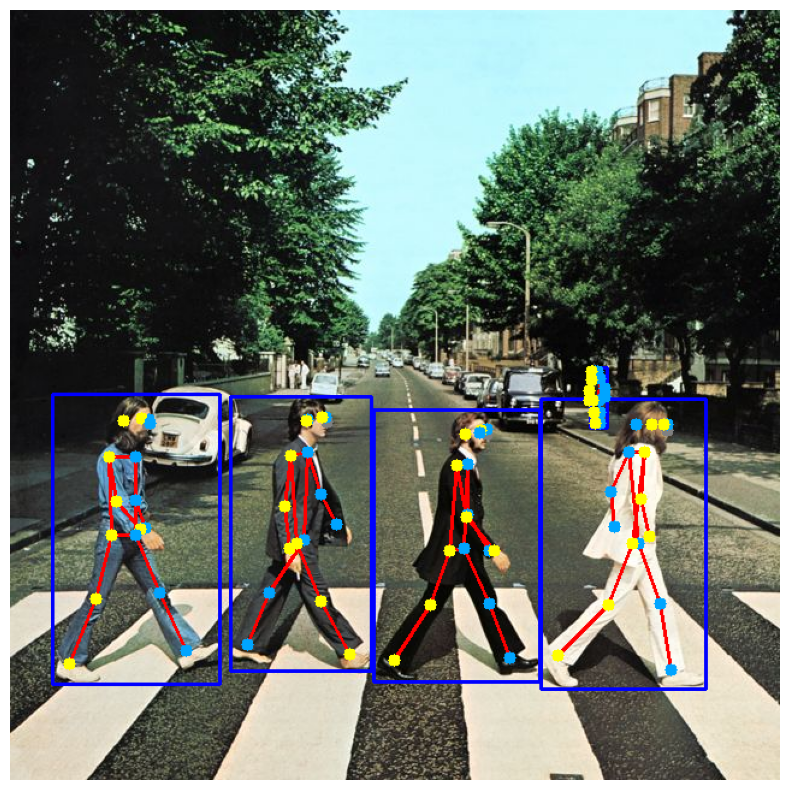

In [16]:
drew_keypoints_img = img.copy()

for result in results:
    keypoints = pose_estimator.get_keypoints(result)
    bbox = pose_estimator.get_bbox(result)
    
    drew_keypoints_img = plot_keypoints(drew_keypoints_img, keypoints, bbox)

img_show(drew_keypoints_img, figure_size=(10, 10))